In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import string
import copy
import os
import pickle
from community import community_louvain
import itertools

from collections import OrderedDict
from random import randrange

In [2]:
# Carga del grafo
G_DM = nx.read_edgelist("./datos/Fly_protein_interactions.txt")

n = nx.number_of_nodes(G_DM)
m = nx.number_of_edges(G_DM)

In [3]:
G_AL = nx.gnm_random_graph(n, m)

## Detección de comunidades

Dado que se trata de una red libre de escala (no llega a serlo por el tamaño, pero tiene todas las propiedades, probablemente se pueda considerar libre de escala), podemos partirla en comunidades y ver qué proteínas están relacionadas entre sí. Dado que son symbols, se puede mirar con qué tienen que ver, no es más que coger los nodos y utilizar código que ya está hecho. 

In [4]:
def max_connected(graph):
    max_graph = max([graph.subgraph(c) 
                     for c in nx.connected_components(graph)], key = len)
    
    return max_graph

def louvain_method(graph, iterations = 100):
    
    modu_list = []
    modu = 0
    for i in range(iterations):
        partition = community_louvain.best_partition(graph)
        x = community_louvain.modularity(partition, graph)
        modu_list.append(x)
        if x > modu:
            modu = x
            best_partition = partition
            
    return modu_list, modu, best_partition

In [5]:
if os.path.isfile("datos/communities_louvain_DM.pkl"):
    with open("datos/communities_louvain_DM.pkl", "rb") as file:
        comminities_louvain_DM = pickle.load(file)
        modu_list_DM, modu_DM, best_partition_DM = comminities_louvain_DM
else:    
    modu_list_DM, modu_DM, best_partition_DM = louvain_method(G_DM)
    with open("datos/communities_louvain_DM.pkl", "wb") as file:
        pickle.dump((modu_list_DM, modu_DM, best_partition_DM), file, -1)

In [6]:
max_G_DM = max_connected(G_DM)

if os.path.isfile("datos/max_communities_louvain_DM.pkl"):
    with open("datos/max_communities_louvain_DM.pkl", "rb") as file:
        max_comminities_louvain_DM = pickle.load(file)
        max_modu_list_DM, max_modu_DM, max_best_partition_DM = max_comminities_louvain_DM
else:    
    max_modu_list_DM, max_modu_DM, max_best_partition_DM = louvain_method(max_G_DM)
    with open("datos/max_communities_louvain_DM.pkl", "wb") as file:
        pickle.dump((max_modu_list_DM, max_modu_DM, max_best_partition_DM), file, -1)

In [7]:
if os.path.isfile("datos/communities_louvain_AL.pkl"):
    with open("datos/communities_louvain_AL.pkl", "rb") as file:
        comminities_louvain_AL = pickle.load(file)
        modu_list_AL, modu_AL, best_partition_AL = comminities_louvain_AL
else:
    modu_list_AL, modu_AL, best_partition_AL = louvain_method(G_AL)
    with open("datos/communities_louvain_AL.pkl", "wb") as file:
        pickle.dump((modu_list_AL, modu_AL, best_partition_AL), file, -1)

In [8]:
n_max = nx.number_of_nodes(max_G_DM)
m_max = nx.number_of_edges(max_G_DM)

max_G_AL = nx.gnm_random_graph(n_max, m_max)

if os.path.isfile("datos/max_communities_louvain_AL.pkl"):
    with open("datos/max_communities_louvain_AL.pkl", "rb") as file:
        comminities_louvain_AL = pickle.load(file)
        max_modu_list_AL, max_modu_AL, max_best_partition_AL = comminities_louvain_AL
else:
    max_modu_list_AL, max_modu_AL, max_best_partition_AL = louvain_method(max_G_AL)
    with open("datos/max_communities_louvain_AL.pkl", "wb") as file:
        pickle.dump((max_modu_list_AL, max_modu_AL, max_best_partition_AL), file, -1)

In [7]:
# ## DM
# max_G_DM = max_connected(G_DM)
# max_modu_list_DM, max_modu_DM, max_best_partition_DM = louvain_method(max_G_DM)

# ## Random 
# n_max = nx.number_of_nodes(max_G_DM)
# m_max = nx.number_of_edges(max_G_DM)

# max_G_AL = nx.gnm_random_graph(n_max, m_max)
# max_modu_list_AL, max_modu_AL, max_best_partition_AL = louvain_method(max_G_AL)


In [13]:
# ## Random 
# n_max = nx.number_of_nodes(max_G_DM)
# m_max = nx.number_of_edges(max_G_DM)

# max_G_AL = nx.gnm_random_graph(n_max, m_max)
# max_modu_list_AL, max_modu_AL, max_best_partition_AL = louvain_method(max_G_AL)


In [48]:
print("DM:")
print(">> Media:", round(np.mean(max_modu_list_DM), 3))
print(">> Desviación estándar:", round(np.std(max_modu_list_DM), 4))
print(">> Máximo:", round(np.max(max_modu_list_DM), 3))
print(">> Máximo:", round(np.min(max_modu_list_DM), 3))

print("AL:")
print(">> Media:", round(np.mean(max_modu_list_AL), 3))
print(">> Desviación estándar:", round(np.std(max_modu_list_AL), 3))
print(">> Máximo:", round(np.max(max_modu_list_AL), 4))
print(">> Máximo:", round(np.min(max_modu_list_AL), 3))

DM:
>> Media: 0.459
>> Desviación estándar: 0.0048
>> Máximo: 0.469
>> Máximo: 0.443
AL:
>> Media: 0.358
>> Desviación estándar: 0.001
>> Máximo: 0.3604
>> Máximo: 0.355


In [24]:
num_com

(7745, 42)

In [37]:
best_partition_DM = max_best_partition_DM

num_com_DM = max(best_partition_DM.items(), key = lambda x: x[1])
range_com_DM = range(num_com_DM[1])

length_DM = []
for i in range_com_DM:
    x = list(filter(lambda y: y[1] == i, best_partition_DM.items()))
    length_DM.append(len(x))

# index con longitudes
index_len_DM = zip(list(range_com_DM), length_DM)

# comunidades ordenadas por tamaño
sort_len_DM = sorted(index_len_DM, key = lambda x: x[1], reverse = True)

# proteínas de la comunidad de mayor tamaño
com_max_size_DM = list(filter(lambda x: x[1] == sort_len[0][0], best_partition.items()))

pos_max_DM = length.index(max(length_DM))
max_com_DM = np.array(list(best_partition_DM.keys()))[np.array(list(best_partition_DM.values())) == pos_max]

In [38]:
best_partition = max_best_partition_AL

num_com = max(best_partition.items(), key = lambda x: x[1])
range_com = range(num_com[1])

length = []
for i in range_com:
    x = list(filter(lambda y: y[1] == i, best_partition.items()))
    length.append(len(x))

# index con longitudes
index_len = zip(list(range_com), length)

# comunidades ordenadas por tamaño
sort_len = sorted(index_len, key = lambda x: x[1], reverse = True)

# proteínas de la comunidad de mayor tamaño
com_max_size = list(filter(lambda x: x[1] == sort_len[0][0], best_partition.items()))

pos_max = length.index(max(length))
max_com = np.array(list(best_partition.keys()))[np.array(list(best_partition.values())) == pos_max]

In [67]:
print("Número de nodos máximo aleatoria:", np.max(np.array(sort_len)[:, 1]))
print("Número de nodos máximo DM:", np.max(np.array(sort_len_DM)[:, 1]))

print("Número de nodos medio aleatoria:", np.mean(np.array(sort_len)[:, 1]))
print("Número de nodos medio DM:", np.mean(np.array(sort_len_DM)[:, 1]))

print("Comunidades con más de 100 nodos: ", sum(np.array(sort_len)[:,1] >= n))
print("Comunidades con más de 100 nodos: ", sum(np.array(sort_len_DM)[:,1] >= n))

Número de nodos máximo aleatoria: 547
Número de nodos máximo DM: 1185
Número de nodos medio aleatoria: 189.07142857142858
Número de nodos medio DM: 256.0
Comunidades con más de 100 nodos:  27
Comunidades con más de 100 nodos:  20


In [68]:
# nx.write_graphml(max_G_AL, path="/home/diego/Documentos/proyectos_master/proyectos_redes/trabajos_redes/Práctica_Final/datos/G_AL_comunidades.graphml")

In [ ]:
DM = np.array(sort_len_DM)[:,1]
AL = np.array(sort_len_AL)[:,1]


fig, ax = plt.subplots()

ind = np.arange(len(AL))

p2 = ax.bar(
)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fae5c4cc278>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae5c4cc9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae5c4cc128>,
 'medians': [<matplotlib.lines.Line2D at 0x7fae5c4df0f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fae5c4df470>,
 'means': []}

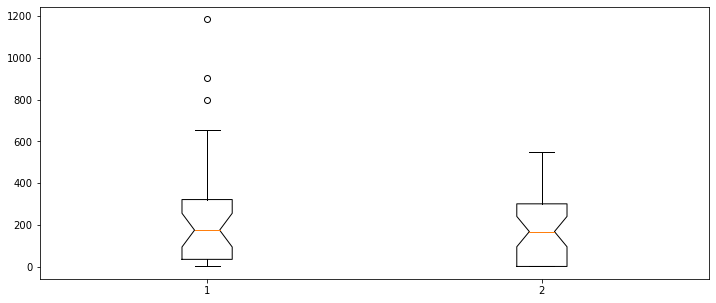

In [59]:
fig = plt.figure(figsize=(12, 5))

plt.boxplot(np.array([np.array(sort_len_DM)[:,1],
                     np.array(sort_len)[:,1]]), notch = True)

In [45]:
print(*sort_len, sep = ", ")

print("Comunidades con más de 100 nodos: ", sum(np.array(sort_len)[:,1] >= 800))

(10, 547), (0, 537), (7, 530), (13, 519), (6, 517), (2, 411), (1, 375), (9, 331), (16, 316), (12, 310), (5, 301), (15, 301), (23, 297), (14, 295), (18, 232), (3, 221), (21, 203), (4, 192), (22, 187), (27, 173), (26, 170), (25, 166), (8, 151), (11, 148), (20, 139), (17, 135), (19, 124), (24, 99), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)
Comunidades con más de 100 nodos:  0


In [11]:
# print(*com_max_size, sep = ", ")
import pandas as pd

# x = pd.DataFrame(best_partition)
# print(best_partition)
df = pd.DataFrame(list(best_partition.items()),columns = ['node','community']) 

df.to_csv("datos/max_tabla_comunidades.csv", index = False, header = True)

In [69]:
# print(*com_max_size, sep = ", ")
import pandas as pd

# x = pd.DataFrame(best_partition)
# print(best_partition)
df = pd.DataFrame(list(max_best_partition_AL.items()),columns = ['node','community']) 

df.to_csv("datos/max_tabla_comunidades_AL.csv", index = False, header = True)

In [30]:
len(sort_len) - 68

29

## Ataques a redes

Voy a generar algunas funciones para llevar a cabo ataques a redes. No he encontrado nada en NetworkX, igual estoy haciendo el canelo y ya está implementado, pero bueno. 

https://stackoverflow.com/questions/40088042/networkx-get-the-distance-between-nodes
https://github.com/riki95/Network-Robustness-with-NetworkX


Nos dio bastante poco sobre ataques a redes, pero viendo las diapositivas y un paper suyo, cuenta bastantes cosas. 

### Ataque aleatorio: 

Primero, la función que hicimos en clase. Elimina ramas aleatoriamente. Otra posibilidad es eliminar los nodos directamente. 

Resultado: tiene sentido, se supone que las redes aleatorias aguantan bien los ataques aleatorios, pero es que los grafos aleatorios siempre van a aguantar más. 

Dos funciones: la continua calcula el orden de la componente conexa de mayor tamaño cada vez 1ue quita un nodo. Quizás debería hacer que quitase 5 nodos cada vez o algo así, tarda bastante, aunque lo hace. 

In [10]:
def random_attack(graph, iterations = None):    
    
    graph_copy = graph.copy()
    
    num_edges = nx.number_of_edges(graph_copy)
    if iterations == None:
        iterations = num_edges//2
    
    for i in range(iterations):
        x = randrange(0, num_edges)

        edge_random = list(graph_copy.edges)[x]
        graph_copy.remove_edge(edge_random[0], edge_random[1])
        num_edges -= 1
    
    return graph_copy


def random_attack_continuous(graph):    
    
    graph_copy = graph.copy()
    
    num_edges = nx.number_of_edges(graph_copy)
    
    order_graph = []
    
    for i in range(num_edges):
        x = randrange(0, num_edges)

        edge_random = list(graph_copy.edges)[x]
        graph_copy.remove_edge(edge_random[0], edge_random[1])
        
        order_graph.append(nx.number_of_nodes(max_connected(graph_copy)))
        num_edges -= 1
    
    return order_graph

#### Resultados función continua

In [11]:
if os.path.isfile("datos/G_DM_random_attack_continuous.pkl"):
    with open("datos/G_DM_random_attack_continuous.pkl", "rb") as file:
        G_DM_random_attack_continuous = pickle.load(file)
else:    
    G_DM_random_attack_continuous = random_attack_continuous(G_DM)
    
    with open("datos/G_DM_random_Attack_continuous.pkl", "wb") as file:
        pickle.dump(G_DM_random_attack_continuous, file, -1)

In [12]:
if os.path.isfile("datos/G_AL_random_attack_continuous.pkl"):
    with open("datos/G_AL_random_attack_continuous.pkl", "rb") as file:
        G_AL_random_attack_continuous = pickle.load(file)
else:    
    G_AL_random_attack_continuous = random_attack_continuous(G_AL)
    
    with open("datos/G_AL_random_Attack_continuous.pkl", "wb") as file:
        pickle.dump(G_AL_random_attack_continuous, file, -1)

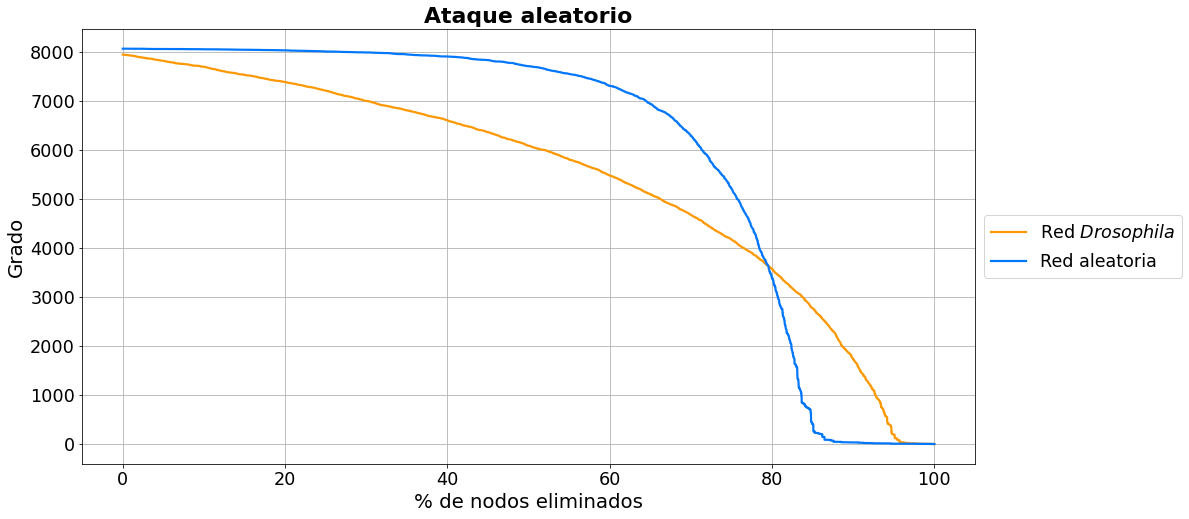

In [40]:
text_size = 22
fig = plt.figure(figsize = (16, 8))

plt.plot((np.arange(len(G_DM_random_attack_continuous))\
          /len(G_DM_random_attack_continuous)) * 100, 
         G_DM_random_attack_continuous, c = "#fc9803", 
         label = "Red $Drosophila$", linewidth = 2.2)
plt.plot((np.arange(len(G_AL_random_attack_continuous))\
          /len(G_AL_random_attack_continuous)) * 100, 
         G_AL_random_attack_continuous, c = "#0377fc",
        label = "Red aleatoria", linewidth = 2.2)

plt.grid()
plt.title("Ataque aleatorio", 
          fontweight = "bold", fontsize = text_size)
plt.xlabel("% de nodos eliminados", fontsize = text_size * 0.9)
plt.ylabel("Grado", fontsize = text_size * 0.9)
plt.tick_params(labelsize = text_size * 0.8)
plt.legend(prop = {'size': text_size * 0.8}, 
           loc='center left', bbox_to_anchor=(1, 0.5))
_ = plt.show()

#### Resultados función no continua

In [14]:
# G_DM_random_attack = random_attack(G_DM, iterations = 1000)
# G_AL_random_attack = random_attack(G_AL, iterations = 1000)

KeyboardInterrupt: 

In [ ]:
# print(nx.info(max_connected(G_DM_random_attack)))
# print(nx.info(max_connected(G_AL_random_attack)))
# print(nx.info(max_connected(G_DM)))
# print(nx.info(max_connected(G_AL)))

## Nodos con mayor grado

**Opciones:** Ir a por los nodos de mayor tamaño, quitar caminos con mayor betweenness. 

La función la he hecho para que se pueda atacar un número de nodos preestablecido o por un determinado umbral de grado. Lo he hecho a lo guarro con prints en vez de raise, pero es para ir rápido.

Lo mismo, una normal y otra continua en la que se van quitando los nodos con mayor grado cada vez. 

In [30]:
def degree_attack(graph, method = "Nodes", n_nodes = None, threshold = None):
    
    graph_copy = graph.copy()
    
    sorted_degree = sorted(graph_copy.degree, 
                           key = lambda x: x[1], 
                           reverse = True)
    
    if method == "Nodes":
        nodes_net = nx.number_of_nodes(graph_copy)
        if n_nodes == None: 
            n_nodes = nodes_net // 3
            
        assert n_nodes < nodes_net, \
        "n_nodes has to be lesser than the size of graph"
        
        for i in range(n_nodes):
            # check si existe, pero deben existir sí o sí
            graph_copy.remove_node(sorted_degree[i][0])
            
    elif method == "Degree":
        if threshold == None:
            threshold = sorted_degree[0][1] // 2
        elif threshold > sorted_degree[0][1]:
            print("no attack, te has pasao loco, cojo la mitad")
            threshold = sorted_degree[0][1] // 2
        for i in sorted_degree:
            if i[1] >= threshold:
                graph_copy.remove_node(i[0])
            else:
                break
    
    else:
        print("No hay métodos con ese nombre")  
        
    return graph_copy

def degree_attack_continuous(graph):
    
    graph_copy = graph.copy()
    
    sorted_degree = sorted(graph_copy.degree, 
                           key = lambda x: x[1], 
                           reverse = True)
    order_graph = []
    
    for i in sorted_degree:
        if graph_copy.has_node(i[0]):
            graph_copy.remove_node(i[0])
            num_nodes = nx.number_of_nodes(max_connected((graph_copy)))
            if num_nodes == 1:
                break
            else:
                order_graph.append(num_nodes)
        
    return order_graph

#### Resolutados función continua

In [31]:
if os.path.isfile("datos/G_DM_degree_attack_continuous.pkl"):
    with open("datos/G_DM_degree_attack_continuous.pkl", "rb") as file:
        G_DM_degree_attack_continuous = pickle.load(file)
else:    
    G_DM_degree_attack_continuous = degree_attack_continuous(G_DM)
    
    with open("datos/G_DM_degree_attack_continuous.pkl", "wb") as file:
        pickle.dump(G_DM_degree_attack_continuous, file, -1)

In [32]:
if os.path.isfile("datos/G_AL_degree_attack_continuous.pkl"):
    with open("datos/G_AL_degree_attack_continuous.pkl", "rb") as file:
        G_AL_degree_attack_continuous = pickle.load(file)
else:    
    G_AL_degree_attack_continuous = degree_attack_continuous(G_AL)
    
    with open("datos/G_AL_degree_attack_continuous.pkl", "wb") as file:
        pickle.dump(G_AL_degree_attack_continuous, file, -1)

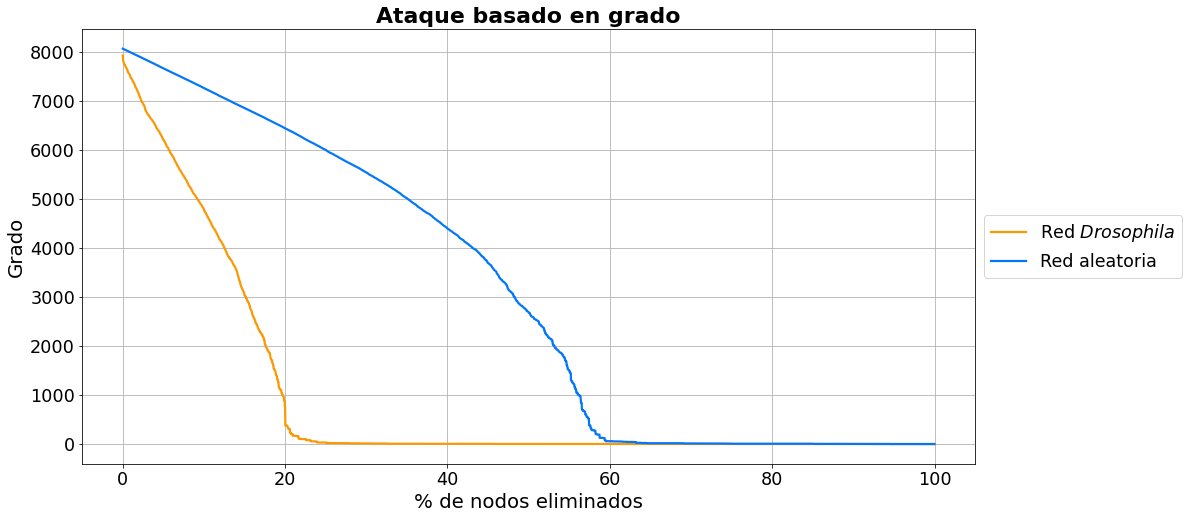

In [43]:
text_size = 22
fig = plt.figure(figsize = (16, 8))

plt.plot((np.arange(len(G_DM_degree_attack_continuous))\
          /len(G_DM_degree_attack_continuous)) * 100, 
         G_DM_degree_attack_continuous, c = "#fc9803", 
         label = "Red $Drosophila$", linewidth = 2.2)
plt.plot((np.arange(len(G_AL_degree_attack_continuous))\
          /len(G_AL_degree_attack_continuous)) * 100, 
         G_AL_degree_attack_continuous, c = "#0377fc",
        label = "Red aleatoria", linewidth = 2.2)

plt.grid()
plt.title("Ataque basado en grado", 
          fontweight = "bold", fontsize = text_size)
plt.xlabel("% de nodos eliminados", fontsize = text_size * 0.9)
plt.ylabel("Grado", fontsize = text_size * 0.9)
plt.tick_params(labelsize = text_size * 0.8)
plt.legend(prop = {'size': text_size * 0.8}, 
           loc='center left', bbox_to_anchor=(1, 0.5))
_ = plt.show()

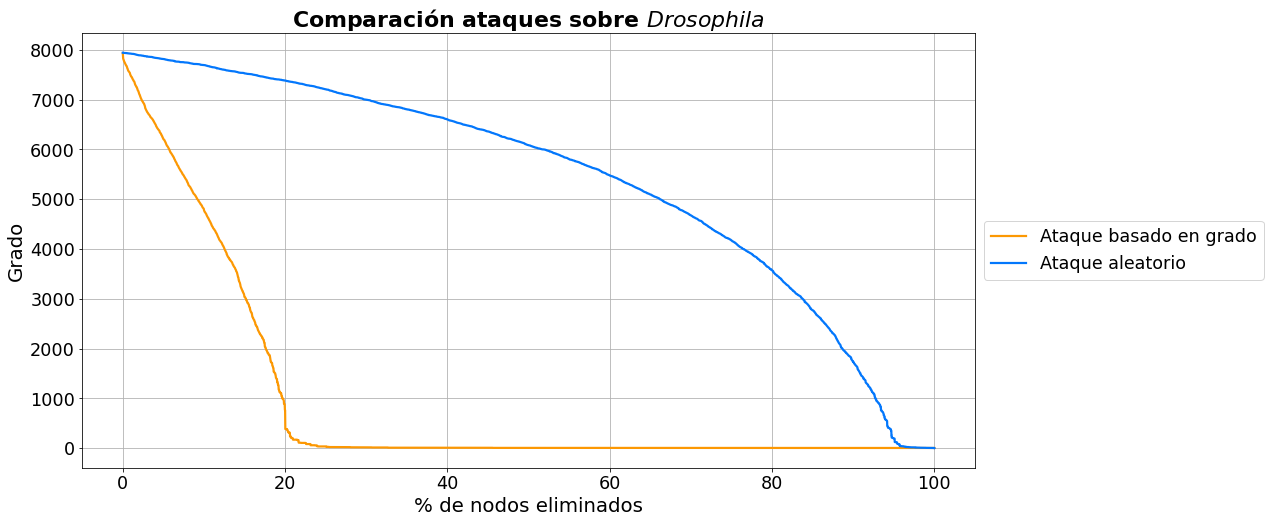

In [48]:
text_size = 22
fig = plt.figure(figsize = (16, 8))

plt.plot((np.arange(len(G_DM_degree_attack_continuous))\
          /len(G_DM_degree_attack_continuous)) * 100, 
         G_DM_degree_attack_continuous, c = "#fc9803", 
         label = "Ataque basado en grado", linewidth = 2.2)
plt.plot((np.arange(len(G_DM_random_attack_continuous))\
          /len(G_DM_random_attack_continuous)) * 100, 
         G_DM_random_attack_continuous, c = "#0377fc",
        label = "Ataque aleatorio", linewidth = 2.2)

plt.grid()
plt.title("Comparación ataques sobre red de $\it{Drosophila}$", 
          fontweight = "bold", fontsize = text_size)
plt.xlabel("% de nodos eliminados", fontsize = text_size * 0.9)
plt.ylabel("Grado", fontsize = text_size * 0.9)
plt.tick_params(labelsize = text_size * 0.8)
plt.legend(prop = {'size': text_size * 0.8}, 
           loc='center left', bbox_to_anchor=(1, 0.5))
_ = plt.show()

In [ ]:
G_DM_degree_attack = degree_attack(G_DM, n_nodes = 100)
G_AL_degree_attack = degree_attack(G_AL, n_nodes = 100)

print(nx.info(max_connected(G_DM)))
print(nx.info(max_connected(G_AL)))

print(nx.info(max_connected(G_DM_degree_attack)))
print(nx.info(max_connected(G_AL_degree_attack)))

### K-cores

Respecto a los k-cores, he estado leyendo y se pueden hacer cosas. Lo que nos contó el profesor es que se suelen coger las proteínas que forman un determinado K-core y ver las relaciones entren ellas. Para comparar con random, se generan X random del mismo tamaño y orden y se mira el numero de K-cores que tienen.

In [ ]:
G_DM_no_loops = copy.deepcopy(G_DM)
G_DM_no_loops.remove_edges_from(nx.selfloop_edges(G_DM_no_loops))
G_AL_no_loops = copy.deepcopy(G_AL)
G_AL_no_loops.remove_edges_from(nx.selfloop_edges(G_AL_no_loops))
Kcore_DM = nx.core_number(G_DM_no_loops)
Kcore_AL = nx.core_number(G_AL_no_loops)